In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

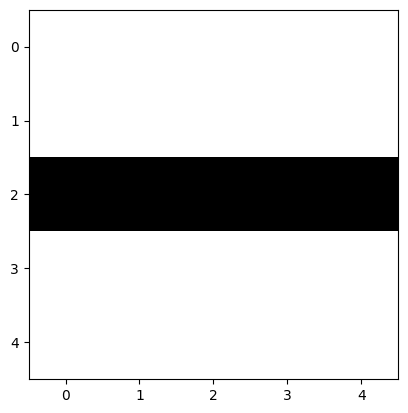

In [3]:
image = np.array([
    [200, 200, 200, 200, 200],
    [200, 200, 200, 200, 200],
    [0, 0, 0, 0, 0],
    [200, 200, 200, 200, 200],
    [200, 200, 200, 200, 200],
])

plt.imshow(image, cmap='gray')

We need to reshape the image matrix in order to fit (batch dimension(image 1), width, height, channel)
On this case:
- batch_dimension: 1
- width: 5
- height: 5
- channel: 1
- Result: (1, 5, 5, 1)

In [21]:
image = image.reshape((1, 5, 5, 1))

image.shape

(1, 5, 5, 1)

In [22]:
model = models.Sequential([
    layers.Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), input_shape=(5, 5, 1), padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2))
])

In [16]:
weights = [np.array([[[[-1]], [[0]], [[1]]],
                     [[[-2]], [[0]], [[2]]],
                     [[[-1]], [[0]], [[1]]]], dtype=np.float32),
           np.array([0], dtype=np.float32)]

model.layers[0].set_weights(weights)

In [20]:
output = model.predict(image)
output.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


(1, 2, 2, 1)

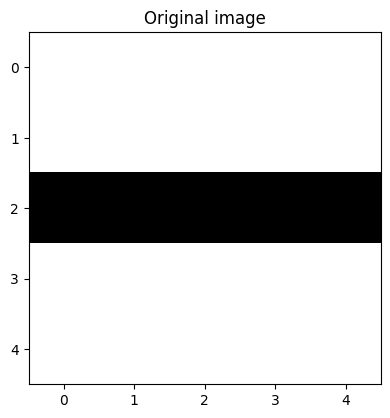

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original image')
plt.imshow(image[0, :, :, 0], cmap='gray')

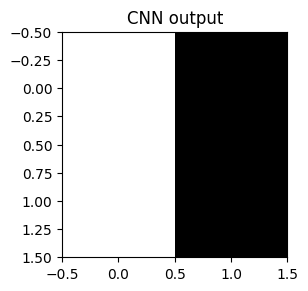

In [19]:
plt.subplot(1, 2, 2)
plt.title('CNN output')
plt.imshow(output[0, :, :, 0], cmap='gray')
plt.show()